In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold
np.random.seed(1)
tf.random.set_seed(1)

In [2]:
weather_data = pd.read_csv(r"C:\Users\bharg\OneDrive\Desktop\PS - 1\imd_bharati_hourly1.csv")
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%Y-%m-%d %H:%M:%S')
weather_data['month'] = weather_data['date'].dt.month
weather_data['hour'] = weather_data['date'].dt.hour
weather_data['year'] = weather_data['date'].dt.year
weather_data.loc[weather_data['temp']<-70, 'temp'] = -70
weather_data = weather_data.fillna(0)
weather_data

,date,temp,ap,ws,wd,month,hour,year
0,2015-02-06 00:00:00,-1.59,962.75,9.20,119.28,2,0,2015
1,2015-02-06 01:00:00,-1.26,962.64,8.85,123.86,2,1,2015
2,2015-02-06 02:00:00,-0.57,962.71,7.19,122.56,2,2,2015
3,2015-02-06 03:00:00,0.00,962.94,6.91,122.74,2,3,2015
4,2015-02-06 04:00:00,0.56,963.31,7.48,110.36,2,4,2015
...,...,...,...,...,...,...,...,...
63643,2022-05-11 19:00:00,-15.27,985.70,7.28,80.32,5,19,2022
63644,2022-05-11 20:00:00,-14.62,985.81,11.81,78.17,5,20,2022
63645,2022-05-11 21:00:00,-14.40,985.93,12.17,77.43,5,21,2022
63646,2022-05-11 22:00:00,-14.17,986.10,10.96,77.03,5,22,2022


In [25]:
window_size = (7*24*2)
X, y = [], []
for i in range(len(weather_data) - window_size - (3*24)):
    X.append(weather_data['temp'][i:i+window_size])
    y.append(weather_data['temp'][i+window_size])
X = np.array(X)
y = np.array(y)

In [26]:
k = 5
kf = KFold(n_splits=k)
train_i = []
test_i = []
for train_index, test_index in kf.split(X):
  train_i.append(train_index)
  test_i.append(test_index)

loss = []



In [27]:
##using a for loop to iterate over all the permutations of train and test data, store the individual losses in a list
for i in range(k):
    X_train = X[train_i[i]]
    y_train = y[train_i[i]]
    X_test = X[test_i[i]]
    y_test = y[test_i[i]]
    model = Sequential()
    model.add(Dense(64, activation='softplus', input_shape=(window_size,)))
    model.add(Dense(64, activation='softplus'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=1)
    loss.append(model.evaluate(X_test, y_test))
    print('Mean Squared:', loss)

Epoch 1/50
506/506 [==============================] - 2s 3ms/step - loss: 4.6871
Epoch 2/50
506/506 [==============================] - 1s 3ms/step - loss: 1.6469
Epoch 3/50
506/506 [==============================] - 1s 3ms/step - loss: 1.4578
Epoch 4/50
506/506 [==============================] - 1s 2ms/step - loss: 1.2565
Epoch 5/50
506/506 [==============================] - 1s 2ms/step - loss: 1.2559
Epoch 6/50
506/506 [==============================] - 1s 3ms/step - loss: 1.1954
Epoch 7/50
506/506 [==============================] - 1s 2ms/step - loss: 1.1439
Epoch 8/50
506/506 [==============================] - 1s 2ms/step - loss: 1.0235
Epoch 9/50
506/506 [==============================] - 1s 2ms/step - loss: 1.0748
Epoch 10/50
506/506 [==============================] - 1s 2ms/step - loss: 0.9960
Epoch 11/50
506/506 [==============================] - 1s 3ms/step - loss: 0.9997
Epoch 12/50
506/506 [==============================] - 1s 3ms/step - loss: 0.9916
Epoch 13/50
506/506 [====

In [28]:

loss

[0.811493456363678,
 0.5243059992790222,
 3.773919105529785,
 0.39136868715286255,
 0.3720410168170929]

In [58]:
X_train = X[train_i[1]]
y_train = y[train_i[1]]
X_test = X[test_i[1]]
y_test = y[test_i[1]]
model = Sequential()
model.add(Dense(64, activation='softplus', input_shape=(window_size,)))
model.add(Dense(64, activation='softplus'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=1)
loss_final = model.evaluate(X_test, y_test)
print('loss_final :', loss_final)

Epoch 1/50
506/506 [==============================] - 2s 3ms/step - loss: 4.9149
Epoch 2/50
506/506 [==============================] - 1s 3ms/step - loss: 1.8261
Epoch 3/50
506/506 [==============================] - 1s 3ms/step - loss: 1.6355
Epoch 4/50
506/506 [==============================] - 1s 3ms/step - loss: 1.3676
Epoch 5/50
506/506 [==============================] - 1s 3ms/step - loss: 1.3429
Epoch 6/50
506/506 [==============================] - 1s 3ms/step - loss: 1.2717
Epoch 7/50
506/506 [==============================] - 1s 3ms/step - loss: 1.2145
Epoch 8/50
506/506 [==============================] - 1s 3ms/step - loss: 1.1192
Epoch 9/50
506/506 [==============================] - 1s 3ms/step - loss: 1.1617
Epoch 10/50
506/506 [==============================] - 1s 3ms/step - loss: 1.0889
Epoch 11/50
506/506 [==============================] - 1s 3ms/step - loss: 1.0657
Epoch 12/50
506/506 [==============================] - 1s 3ms/step - loss: 1.0717
Epoch 13/50
506/506 [====

In [59]:
future = []
asdf = weather_data['temp'][-(window_size): ]
for i in range(3*24):
    asdf = np.array([asdf])
    aaa = model.predict(asdf)
    pre_temp = aaa[0][0]
    future.append(pre_temp)
    asdf = np.append(asdf[0],pre_temp)[-(window_size): ]

1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 16ms/step


In [60]:
date_index = pd.date_range(start='2015-02-06 00:00:00', end='2022-05-14 23:00:00', freq='1H')
date_list = date_index.to_list()
temperatures =  weather_data['temp'].to_list()
temperatures = temperatures + future
df = pd.DataFrame(date_list)
df['date'] = date_list
df['temperatures'] = temperatures
df['future'] = temperatures
df['temperatures'][ 63647: ] = 0
df['future'][ :63647] = 0
df

C:\Users\bharg\AppData\Local\Temp\ipykernel_6128\3144152305.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temperatures'][ 63647: ] = 0
C:\Users\bharg\AppData\Local\Temp\ipykernel_6128\3144152305.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['future'][ :63647] = 0


,0,date,temperatures,future
0,2015-02-06 00:00:00,2015-02-06 00:00:00,-1.59,0.000000
1,2015-02-06 01:00:00,2015-02-06 01:00:00,-1.26,0.000000
2,2015-02-06 02:00:00,2015-02-06 02:00:00,-0.57,0.000000
3,2015-02-06 03:00:00,2015-02-06 03:00:00,0.00,0.000000
4,2015-02-06 04:00:00,2015-02-06 04:00:00,0.56,0.000000
...,...,...,...,...
63715,2022-05-14 19:00:00,2022-05-14 19:00:00,0.00,-39.587128
63716,2022-05-14 20:00:00,2022-05-14 20:00:00,0.00,-39.599297
63717,2022-05-14 21:00:00,2022-05-14 21:00:00,0.00,-39.705090
63718,2022-05-14 22:00:00,2022-05-14 22:00:00,0.00,-39.686813


In [61]:
predict = []
for i in range(62500, len(weather_data) - window_size):
    asdf = weather_data['temp'][i: i + window_size]
    asdf = np.array([asdf])
    aaa = model.predict(asdf)
    pre_temp = aaa[0][0]
    predict.append(pre_temp)
x = 0
weather_data['predict'] = 0
for i in range(62500+window_size,63648):
    weather_data['predict'][i] = predict[x]
    x = x+1
weather_data

1/1 [==============================] - 0s 29ms/step


C:\Users\bharg\AppData\Local\Temp\ipykernel_6128\322255350.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['predict'][i] = predict[x]


,date,temp,ap,ws,wd,month,hour,year,predict
0,2015-02-06 00:00:00,-1.59,962.75,9.20,119.28,2,0,2015,0.000000
1,2015-02-06 01:00:00,-1.26,962.64,8.85,123.86,2,1,2015,0.000000
2,2015-02-06 02:00:00,-0.57,962.71,7.19,122.56,2,2,2015,0.000000
3,2015-02-06 03:00:00,0.00,962.94,6.91,122.74,2,3,2015,0.000000
4,2015-02-06 04:00:00,0.56,963.31,7.48,110.36,2,4,2015,0.000000
...,...,...,...,...,...,...,...,...,...
63643,2022-05-11 19:00:00,-15.27,985.70,7.28,80.32,5,19,2022,-16.500175
63644,2022-05-11 20:00:00,-14.62,985.81,11.81,78.17,5,20,2022,-15.813943
63645,2022-05-11 21:00:00,-14.40,985.93,12.17,77.43,5,21,2022,-15.194717
63646,2022-05-11 22:00:00,-14.17,986.10,10.96,77.03,5,22,2022,-14.952497


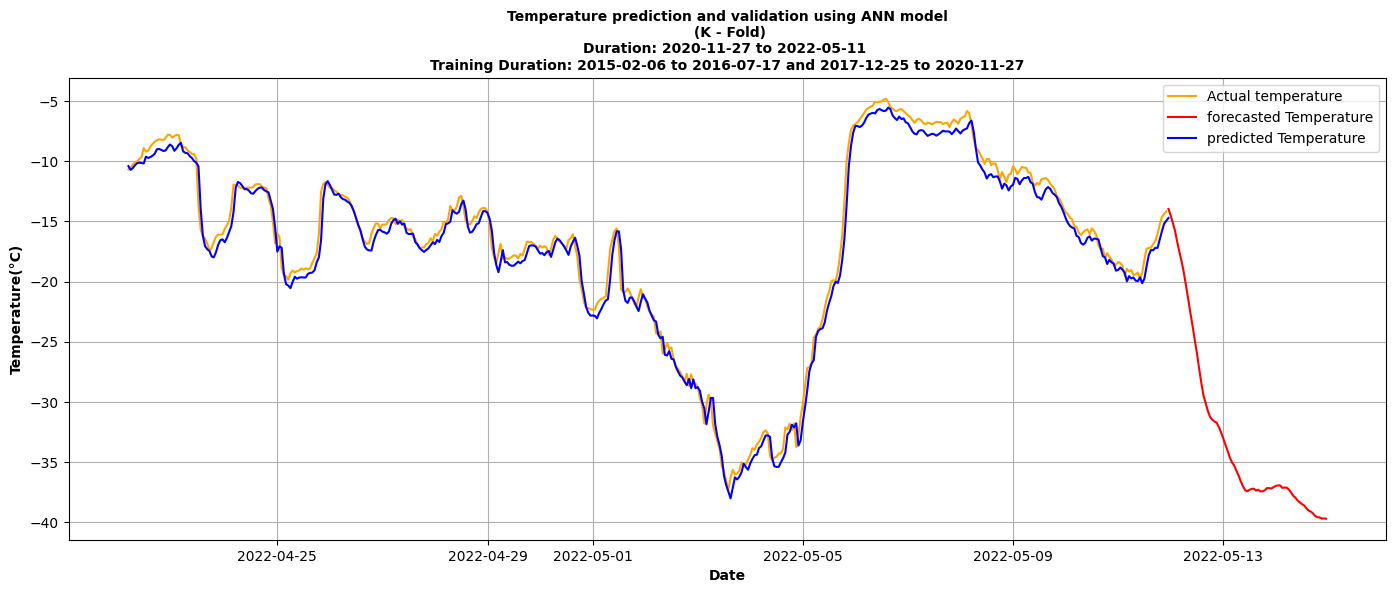

In [62]:
plt.figure(figsize=(17, 6))
plt.plot(df['date'][63172:63647],df['temperatures'][63172:63647],label = 'Actual temperature',color = 'orange')
plt.plot(df['date'][63647: ],df['future'][63647:], label = 'forecasted Temperature', color = 'red')
plt.plot(weather_data['date'][63172: ],weather_data['predict'][63172: ], label = 'predicted Temperature', color = 'blue')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Temperature(°C)',fontweight='bold')
plt.legend()
plt.title('Temperature prediction and validation using ANN model\n (K - Fold)\nDuration: 2020-11-27 to 2022-05-11 \nTraining Duration: 2015-02-06 to 2016-07-17 and 2017-12-25 to 2020-11-27', fontsize=10, fontweight='bold')
plt.grid(True)
plt.savefig("ANN_kfold")

In [63]:
test_i[1]

array([12648, 12649, 12650, ..., 25293, 25294, 25295])

In [64]:
print(weather_data['date'][12648])
print(weather_data['date'][25295])


2016-07-17 00:00:00
2017-12-25 23:00:00
